In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from matplotlib import pyplot as plt
from dotenv import load_dotenv
from sklearn import preprocessing, model_selection, linear_model
from sklearn import metrics, dummy

load_dotenv()
sns.color_palette('colorblind')
plt.style.use('Solarize_Light2')

# Setting default DPI, pulling it from dotenv if it exists, setting it on 100 if not

try:
    pc_cores = int(os.getenv('CORES'))

except TypeError:
    pc_cores = 4

try:
    pc_dpi = int(os.getenv('DPI'))

except TypeError:
    pc_dpi = 100

if pc_dpi is None:
    pc_dpi = 100

if pc_dpi >= 155:
    pc_dpi = 155


In [16]:
file_ghg_eui = "./data/seattle_predict_ghg_eui.csv"


In [17]:
df_model = pd.read_csv(file_ghg_eui).astype(float)

df_model.columns


Index(['OSEBuildingID', 'scaled_Electricity(kWh)',
       'scaled_GHGEmissions(MetricTonsCO2e)',
       'scaled_GHGEmissionsIntensity(kgCO2e/ft2)', 'scaled_SourceEUI(kWh/m2)',
       'scaled_SiteEnergyUse(kWh)', 'scaled_SiteEnergyUseWN(kWh)',
       'scaled_NaturalGas(kWh)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'ENERGYSTARScore', 'ohe_nbhood_BALLARD',
       'ohe_nbhood_CENTRAL', 'ohe_nbhood_DELRIDGE', 'ohe_nbhood_DOWNTOWN',
       'ohe_nbhood_EAST', 'ohe_nbhood_GREATER DUWAMISH',
       'ohe_nbhood_LAKE UNION', 'ohe_nbhood_MAGNOLIA / QUEEN ANNE',
       'ohe_nbhood_NORTH', 'ohe_nbhood_NORTHEAST', 'ohe_nbhood_NORTHWEST',
       'ohe_nbhood_SOUTHEAST', 'ohe_nbhood_SOUTHWEST', 'ohe_ptype_Hospital',
       'ohe_ptype_Hotel', 'ohe_ptype_K-12 School', 'ohe_ptype_Large Office',
       'ohe_ptype_Mixed Use Property', 'ohe_ptype_Office', 'ohe_ptype_Other',
       'ohe_ptype_Refrigerated Warehouse', 'ohe_ptype_Residence Hall',
       'ohe_ptype_Small & Medium medical facil

In [18]:
df_model.head(n=5)

,OSEBuildingID,scaled_Electricity(kWh),scaled_GHGEmissions(MetricTonsCO2e),scaled_GHGEmissionsIntensity(kgCO2e/ft2),scaled_SourceEUI(kWh/m2),scaled_SiteEnergyUse(kWh),scaled_SiteEnergyUseWN(kWh),scaled_NaturalGas(kWh),YearBuilt,NumberofBuildings,...,ohe_ptype_Mixed Use Property,ohe_ptype_Office,ohe_ptype_Other,ohe_ptype_Refrigerated Warehouse,ohe_ptype_Residence Hall,ohe_ptype_Small & Medium medical facility,ohe_ptype_Small & Mid-Sized Office,ohe_ptype_Supermarket & Grocery store,ohe_ptype_Warehouse,ohe_ptype_Worship Facility
0,1.0,0.963847,2.331658,1.770173,1.012887,1.871456,1.841703,0.500705,1927.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.615322,2.897230,1.799564,0.913481,2.364731,2.335691,4.178122,1996.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.380423,2.780985,3.572830,1.536320,1.688096,1.633029,1.009034,1926.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,0.401384,1.421417,1.074583,0.455283,1.248236,1.271392,2.089235,1926.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,-0.326328,3.296262,3.945117,0.564008,1.603790,1.392459,2.706276,1928.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_model.set_index("OSEBuildingID", inplace=True)


In [20]:
df_model.dropna(inplace=True)


In [21]:
ohe_cols = [col for col in df_model.columns if col.startswith("ohe")]

df_plot_features = df_model.drop(columns=ohe_cols)


In [22]:
df_train, df_test = model_selection.train_test_split(df_model, test_size=0.30)


In [23]:
# Target_1 : GHGEmissionsIntensity(kgCO2e/ft2)

X_train = df_train.drop(columns="scaled_GHGEmissionsIntensity(kgCO2e/ft2)").to_numpy()
X_test = df_test.drop(columns="scaled_GHGEmissionsIntensity(kgCO2e/ft2)").to_numpy()

y_train = df_train[["scaled_GHGEmissionsIntensity(kgCO2e/ft2)"]].to_numpy()
y_test = df_test[["scaled_GHGEmissionsIntensity(kgCO2e/ft2)"]].to_numpy()


In [24]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X=X_test)


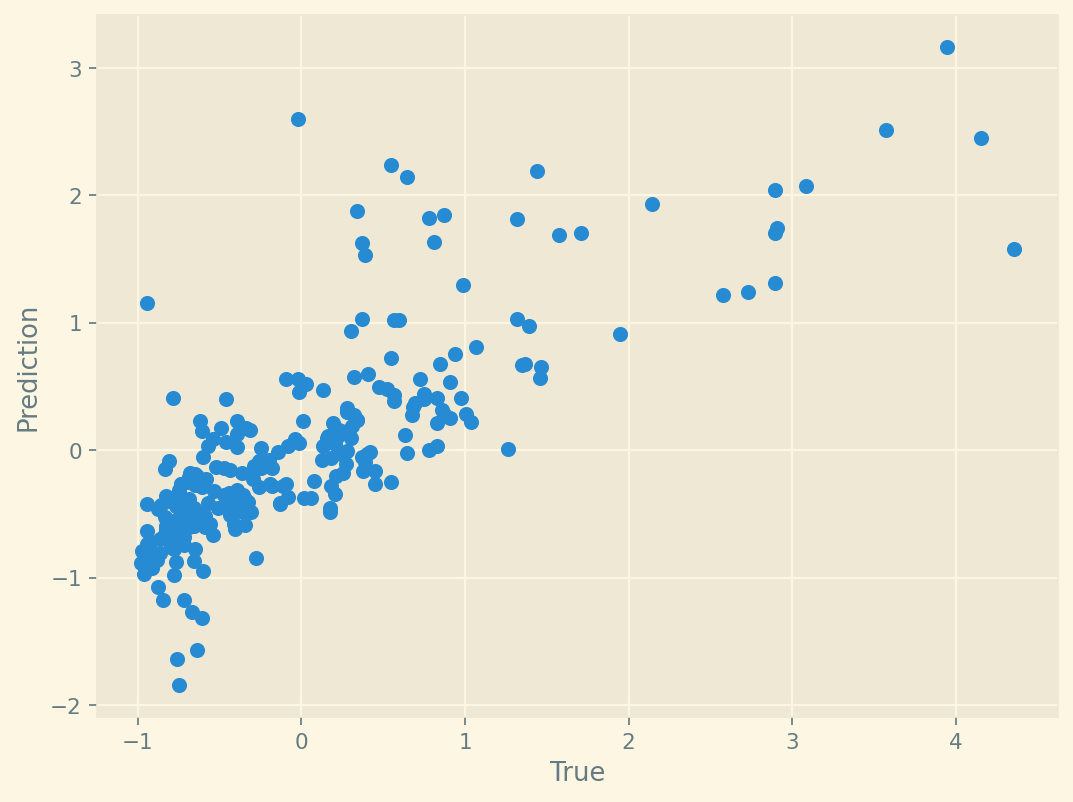

In [25]:
fig, (ax1) = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(8, 6),
    dpi=pc_dpi,
)

ax1.scatter(y_test, y_pred)

###
# Titles/Lables
ax1.set_xlabel("True")
ax1.set_ylabel("Prediction")
#
###

plt.show()


In [26]:
rse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

rmse = np.sqrt(rse)

print(f"RMSE = {rmse}")

r_two = metrics.r2_score(y_true=y_test, y_pred=y_pred)

print(f"R2 Score = {r_two}")

## Regression par une droite non concluante --> regression polynomiale


RMSE = 0.5769028410998859
R2 Score = 0.6386109354842471


In [27]:
df_train.head()

,scaled_Electricity(kWh),scaled_GHGEmissions(MetricTonsCO2e),scaled_GHGEmissionsIntensity(kgCO2e/ft2),scaled_SourceEUI(kWh/m2),scaled_SiteEnergyUse(kWh),scaled_SiteEnergyUseWN(kWh),scaled_NaturalGas(kWh),YearBuilt,NumberofBuildings,NumberofFloors,...,ohe_ptype_Mixed Use Property,ohe_ptype_Office,ohe_ptype_Other,ohe_ptype_Refrigerated Warehouse,ohe_ptype_Residence Hall,ohe_ptype_Small & Medium medical facility,ohe_ptype_Small & Mid-Sized Office,ohe_ptype_Supermarket & Grocery store,ohe_ptype_Warehouse,ohe_ptype_Worship Facility
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
26393.0,-0.362448,-0.278875,0.104675,0.621477,-0.423218,-0.429839,-0.187266,1953.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19845.0,-0.519285,-0.526775,-0.316598,0.126002,-0.700709,-0.699168,-0.507619,1996.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20425.0,-0.653561,-0.214280,0.124269,-0.636626,-0.597978,-0.568445,-0.020143,1923.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
719.0,-0.488869,-0.662621,-0.943609,-1.374403,-0.766249,-0.793506,-0.712658,1960.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20000.0,-0.729768,-0.300817,-0.228425,-1.042015,-0.710841,-0.677796,-0.126622,1928.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
scores_regression = model_selection.cross_val_score(
        lin_reg,
        X=X_train,
        y=y_train,
        scoring='r2',
        cv=50,
        n_jobs=-1,
    )

mean_r2_regression = scores_regression.mean()

print(f"Mean r2 score on 20 cv for linear regression = {mean_r2_regression}")


Mean r2 score on 20 cv for linear regression = 0.3301973709746221


In [29]:
y_pred_basic = lin_reg.predict(X_test)

rse_basic = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_basic)
rmse_basic = np.sqrt(rse_basic)

r2_basic = metrics.r2_score(y_true=y_test, y_pred=y_pred_basic)

mae_basic = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_basic)

print(f"""Metrics : \n######################
RMSE: {rmse_basic}\nr2_score : {r2_basic} \nMAE : {mae_basic}""")


Metrics : 
######################
RMSE: 0.5769028410998859
r2_score : 0.6386109354842471 
MAE : 0.4042570556445015


In [30]:
# Dummy 

dummy_reg_ghg = dummy.DummyRegressor()

scores_dummy = model_selection.cross_val_score(
        dummy_reg_ghg,
        X=X_train,
        y=y_train,
        scoring='r2',
        cv=50,
        n_jobs=-1,
    )

dummy_reg_ghg.fit(
    X=X_train,
    y=y_train
)


DummyRegressor()

In [31]:
y_pred_dummy = dummy_reg_ghg.predict(X_test)

rse_dummy = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_dummy)
rmse_dummy = np.sqrt(rse_dummy)

r2_dummy = metrics.r2_score(y_true=y_test, y_pred=y_pred_dummy)

mae_dummy = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_dummy)

print(f"""Metrics : \n######################
RMSE: {rmse_dummy}\nr2_score : {r2_dummy} \nMAE : {mae_dummy}""")


Metrics : 
######################
RMSE: 0.9599326327160534
r2_score : -0.0005784907561459107 
MAE : 0.7081578651542835


In [32]:
# # Ridge

# ridge = linear_model.Ridge()

# n_alphas = 200
# alphas = np.logspace(-5, 5, n_alphas)
# parameter = {"alpha": alphas}
# clf_ridge_ghg = model_selection.GridSearchCV(
#     estimator=ridge,
#     param_grid=parameter,
#     scoring="r2",
#     cv=50,
#     n_jobs=-1
# )

# clf_ridge_ghg.fit(
#         X=X_train,
#         y=y_train
#     )

# print("done .. ")


In [33]:
# best_alpha_ridge_ghg = clf_ridge_ghg.best_params_["alpha"]

# print("Best alpha for ridge = ", best_alpha_ridge_ghg)


In [34]:
# y_pred_ridge_ghg = clf_ridge_ghg.predict(X_test)

# rse_ridge_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_ridge_ghg)
# rmse_ridge_ghg = np.sqrt(rse_ridge_ghg)

# r2_ridge_ghg = metrics.r2_score(y_true=y_test, y_pred=y_pred_ridge_ghg)

# mae_ridge_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_ridge_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_ridge_ghg}\nr2_score : {r2_ridge_ghg} \nMAE : {mae_ridge_ghg}""")


In [35]:
# # Lasso

# lasso = linear_model.Lasso()
# parameter["alpha"] = np.arange(0.01, 10, 0.01)

# clf_lasso_ghg = model_selection.GridSearchCV(
#     estimator=lasso,
#     scoring="r2",
#     param_grid=parameter,
#     cv=50,
#     n_jobs=-1
# )

# clf_lasso_ghg.fit(
#         X=X_train,
#         y=y_train
#     )

# print("done .. ")


In [36]:
# best_alpha_lasso_ghg = clf_lasso_ghg.best_params_["alpha"]

# print("Best alpha for lasso = ", best_alpha_lasso_ghg)


In [37]:
# y_pred_lasso_ghg = clf_lasso_ghg.predict(X_test)

# rse_lasso_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_lasso_ghg)
# rmse_lasso_ghg = np.sqrt(rse_lasso_ghg)

# r2_lasso_ghg = metrics.r2_score(y_true=y_test,y_pred=y_pred_lasso_ghg)

# mae_lasso_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_lasso_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_lasso_ghg}\nr2_score : {r2_lasso_ghg} \nMAE : {mae_lasso_ghg}""")


In [38]:
# l1_range = np.arange(0.01, 0.99, 0.05)

# clf_elastic_net = linear_model.ElasticNetCV(
#     l1_ratio=l1_range,
#     n_alphas=200,
#     cv=50,
#     n_jobs=-1,
# )

# clf_elastic_net.fit(
#     X=X_train,
#     y=y_train
# )

# print("done .. ")


In [39]:
# print(clf_elastic_net.l1_ratio_)
# print(clf_elastic_net.alpha_)


In [40]:
# y_pred_enet_ghg = clf_elastic_net.predict(X_test)

# rse_enet_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_enet_ghg)
# rmse_enet_ghg = np.sqrt(rse_enet_ghg)

# r2_enet_ghg = metrics.r2_score(y_true=y_test,y_pred=y_pred_enet_ghg)

# mae_enet_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_enet_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_enet_ghg}\nr2_score : {r2_enet_ghg} \nMAE : {mae_enet_ghg}""")


In [41]:
# y_pred_lasso_ghg

# print((((y_pred_lasso_ghg) - y_test) ** 2).sum())

Classes test : Heresy : imports not in 1st cell

In [42]:
from scripts.models.regressions import Regressions

In [43]:
ghg_target = "scaled_GHGEmissionsIntensity(kgCO2e/ft2)"
ghg_regression = Regressions(dataframe=df_model, target_col=ghg_target)


In [44]:
ghg_regression.display_all_metrics()

Step : Elastic Net


/Users/psemp/Documents/GitHub/ds_p4/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Step : Lasso
Step : Ridge
Step : standard regression

###############

Standard :
 - rss  =  124.50572385317672
 - r2_score  =  0.5773137613661231
 - rsme  =  0.6906760635238599
 - mae  =  0.419752195986333

###############

Ridge :
 - Ridge best alpha = 86.0346441668451
 - rss  =  137.88960140522317
 - r2_score  =  0.5318766466236545
 - rsme  =  0.7268511877008648
 - mae  =  0.4433860435527762

###############

LASSO : 
 - Best LASSO alpha : 0.060000000000000005
 - rss  =  101848.40545850772
 - r2_score  =  0.4987651563352591
 - rsme  =  0.7521179913729663
 - mae  =  0.4597716396476093

###############

Elastic Net :
 - Elastic net best l1 ratio = 0.060000000000000005
 - Elastic net best alpha = 0.1631473402522356
 - rss  =  102287.60641038239
 - r2_score  =  0.5106985290650522
 - rsme  =  0.7431108653930343
 - mae  =  0.45411928477021024


In [45]:
ghg_regression.df_predictions

,True,Elastic_Net,lasso,ridge,basic_regression
0,1.417479,0.516870,0.492044,0.529827,0.536324
1,0.908033,0.533812,0.531182,0.561103,0.553048
2,1.858346,-0.012293,-0.066670,0.038618,0.383601
3,-0.963203,-0.647970,-0.642236,-0.682492,-0.741950
4,-0.022687,-0.112043,-0.130378,-0.103628,-0.243209
...,...,...,...,...,...
256,-0.394975,0.044265,-0.032504,0.039702,0.190477
257,2.730284,0.994355,0.922648,0.998118,1.287950
258,-0.835842,-0.180567,-0.210474,-0.155474,-0.266358
259,0.241834,-0.102462,-0.117136,-0.091899,-0.045804


In [53]:
ghg_regression.clf_ridge.best_params_

{'alpha': 86.0346441668451}

In [54]:
ghg_regression.clf_ridge.best_score_

0.537648921951131